In [2]:
"""
In this code, I will implement an algorithm to compress images. 
This algorithm will use a method that I learned in Linear Algebra which is called SVD matrix decomposition
"""

'\nIn this code, I will implement an algorithm to compress images. \nThis algorithm will use a method that I learned in Linear Algebra which is called SVD matrix decomposition\n'

In [3]:
import numpy as np
import cv2
import matplotlib.image as mpimg
from PIL import Image
import matplotlib.pyplot as plt
import os

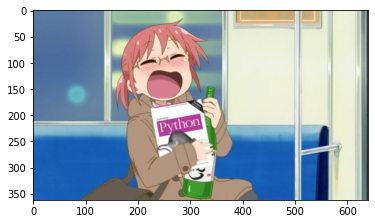

In [4]:
#original picture
x, y, z = mpimg.imread('photo1.png').shape
img = mpimg.imread('photo1.png')
plt.imshow(img)

In [5]:
print(img.dtype)

float32


In [6]:
im = Image.open('photo1.png', 'r')
pix = im.load()

In [7]:
def createAllMatrix(pix, im): 
    x, y = im.size
    imgR = np.zeros((x,y),dtype=int)
    imgG = np.zeros((x,y),dtype=int)
    imgB = np.zeros((x,y),dtype=int)
    for i in range(x): 
        for j in range(y): 
            imgR[i, j] = pix[i, j][0]
            imgG[i, j] = pix[i, j][1]
            imgB[i, j] = pix[i, j][2]

    return imgR.T, imgG.T, imgB.T

imgR, imgG, imgB = createAllMatrix(pix, im)

In [8]:
svdRGB = [np.linalg.svd(imgR, full_matrices=True), np.linalg.svd(imgG, full_matrices=True), np.linalg.svd(imgB, full_matrices=True)]

#u, s, vt = np.linalg.svd(img, full_matrices=True) #img = u*s*vt
#print(img.shape, u.shape, s.shape, vt.shape)

In [9]:
def compression(k, svdRGB):
    # We have to keep in mind that the values in the S matrix are decreasing. 
    # This means that the first value of that matrix contains the highest amount of information and we can conclude that deleting the last values will result in a shorter image size. If the last value contain the least amount of information then deleting 
    # it won't distord the image too much. 
    compressedImgRgb = []

    for svdValues in svdRGB: 
        # k is the precision (smaller k => larger compression)
        #truncate the matrix 

        u = svdValues[0]
        s = svdValues[1]
        vt = svdValues[2]

        u = u[:, :k]
        s = s[:k]
        vt = vt[:k]
        # Calculate the compressed image matrix
        compressedIMG = np.dot(u * s, vt)
        compressedImgRgb.append(compressedIMG)

    return compressedImgRgb

In [12]:
def buildImg(img, compressedImgRgb, k):
    #compressedImgRgb conains the red green and blue matrix of the compressed image. 
    #I want to combinate those three matrix to have a colored image.
    x, y = compressedImgRgb[0].shape
    coloredImg = np.zeros((x,y,3),dtype=int) 
    for i in range(x): 
        for j in range(y):
            coloredImg[i][j][0] = (compressedImgRgb[0])[i][j]
            coloredImg[i][j][1] = (compressedImgRgb[1])[i][j]
            coloredImg[i][j][2] = (compressedImgRgb[2])[i][j]



    info = np.iinfo(coloredImg.dtype) # Get the information of the incoming image type
    data = coloredImg.astype(np.int32) / info.max # normalize the data to 0 - 1
    imgFinal = coloredImg.astype(np.uint8)
    print(imgFinal.dtype)
    return imgFinal

uint8
uint8
uint8


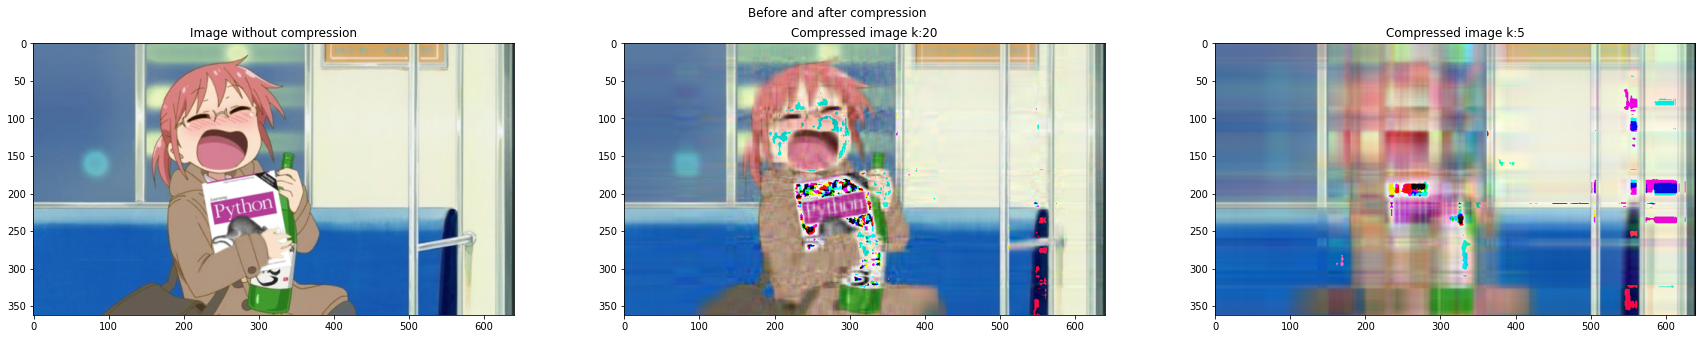

In [14]:
fig, axs = plt.subplots(1, 3, figsize=(30, 5))
fig.suptitle("Before and after compression")
axs[0].set_title("Image without compression")
axs[0].imshow(buildImg(img, compression(362, svdRGB), 362))
axs[1].set_title("Compressed image k:20")
axs[1].imshow(buildImg(img, compression(20, svdRGB), 20))

axs[2].set_title("Compressed image k:5")
axs[2].imshow(buildImg(img, compression(5, svdRGB), 5))